In [117]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Задание 1 из ДЗ

In [119]:
import numpy as np

import matplotlib.pyplot as plt

# Задаю выборку
sample = np.array([1.8, 2, 3.3, 2.6, 1.3, -4, 0.5, 0.7, -0.7, 5.1, 5.7, 2])

# Несмещенная оценка мат ожидания

In [120]:
x = .0
for s in sample:
    x = x + s
x = x / len(sample)
print("Неспещеная оценка мат ожидания {}".format(x))

Неспещеная оценка мат ожидания 1.6916666666666664


# Несмещенная оценка дисперсии с несмещенной оценкой мат ожидания

In [121]:
sigma = .0
for s in sample:
    sigma = sigma + (s - x)**2
sigma = sigma / (len(sample) - 1)
print(f"Неспещенная оценка дисперсии {sigma}")

Неспещенная оценка дисперсии 6.542651515151515


# Несмещенная оценка дисперсии с фактическим значением мат ожидания

In [122]:
sigma_real_calc = .0
mean = 1.5
sigma_real = 2.5

for s in sample:
    sigma_real_calc = sigma_real_calc + (s - mean)**2

sigma_real_calc = sigma_real_calc / (len(sample))
print("оценка дисперсии с фактическим мат ожиданием {}".format(sigma_real_calc))
# Погрешность
print("Погрешность оценки дисперсии {}%".format(abs(sigma_real_calc-sigma_real**2) / sigma_real * 100))

оценка дисперсии с фактическим мат ожиданием 6.034166666666667
Погрешность оценки дисперсии 8.633333333333333%


# Задание 2 из ДЗ. Метод моментов

# Оценки мат ожидания и дисперсии для нормального распределения

In [123]:
freqs = [6, 7, 11, 17, 19, 18, 13, 5, 3, 1]
l = len(freqs)
total_n = 100.
min_ = 10
max_ = 54
step = int((max_-min_)/l)
max_ = max_ + step
ranges = [s for s in range(min_ ,max_, step)]
means = []
calc_freqs = [f/total_n for f in freqs]

for idx in range(0,l):
    means.append((ranges[idx] + ranges[idx+1])/2)
    
#print(ranges)
#print(means)
#print(calc_freqs)

calc_mean = 0.
for idx in range(0,l):
    calc_mean = calc_mean + means[idx]*calc_freqs[idx]

print(f"Оценка мат ожидания {calc_mean}")

calc_sigma = .0
for idx in range(0,10):
    calc_sigma = calc_sigma + (calc_mean - means[idx])**2*calc_freqs[idx]

print(f"Оценка дисперсии {calc_sigma**0.5}")

Оценка мат ожидания 27.680000000000003
Оценка дисперсии 8.073264519387433


# Оценки параметров равномерного распределения

In [124]:
print(f"Оценка параметр а {calc_mean-calc_sigma**0.5*3**0.5}")
print(f"Оценка параметр а {calc_mean+calc_sigma**0.5*3**0.5}")

Оценка параметр а 13.696695669477837
Оценка параметр а 41.663304330522166


# Задание 3 из ДЗ. Метод максимального правдоподобия

# Нормальное распределение

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5]
[0.08163265306122448, 0.08503401360544217, 0.0782312925170068, 0.09183673469387756, 0.08843537414965986, 0.08503401360544217, 0.08503401360544217, 0.0782312925170068, 0.08163265306122448, 0.0782312925170068, 0.0782312925170068, 0.08843537414965986]
Оценка мат ожидания 8.965986394557822
Оценка дисперсии 2.747964284937694


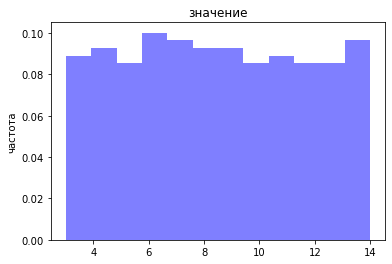

In [125]:
freqs = [24, 25, 23, 27, 26, 25, 25, 23, 24, 23, 23, 26]
total_n = sum(freqs)
l = len(freqs)
min_ = 3
max_ = 15
step = int((max_-min_)/l)
max_ = max_ + step
ranges = [s for s in range(min_ ,max_, step)]
means = []
calc_freqs = [f/total_n for f in freqs]

for idx in range(0,l):
    means.append((ranges[idx] + ranges[idx+1])/2)
    
print(ranges)
print(means)
print(calc_freqs)

calc_mean = 0.
for idx in range(0,l):
    calc_mean = calc_mean + means[idx]*calc_freqs[idx]

print(f"Оценка мат ожидания {calc_mean}")

calc_sigma = .0
for idx in range(0,10):
    calc_sigma = calc_sigma + (calc_mean - means[idx])**2*calc_freqs[idx]

print(f"Оценка дисперсии {calc_sigma**0.5}")

# Гистограмма
run = []
for i in range(min_, max_-1):
    run += [ i for v in range(0,freqs[i-min_]) ]
fig2 = plt.figure()
hist1 = fig2.add_subplot(111)
hist1.set_ylabel('частота')
hist1.set_title('значение')

plt.hist(run, len(freqs),
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

# Равномерное распределение

In [126]:
#С учетом данных слайда №25 из лекции
#оценка a
x_min = 3
x_max = 15
n = 294

a = x_min
# оценка b 
b = x_max
freq = (b - a) / n
print(f"оценка равномерной плотности {freq*100} %")


оценка равномерной плотности 4.081632653061225 %


# Интервальная оценка вероятности в выборках распределения Бернулли

In [127]:
p_low = 0.2
p_mid = 0.55
p_high = 0.87
n = 100

# три выборки с распределением Бернулли с различной вероятностью
sample_low = np.random.binomial(1, p_low, n)
sample_mid = np.random.binomial(1, p_mid, n)
sample_high = np.random.binomial(1, p_high, n)
#print(sample_low)

# кол-во успешных попыток
success_low = np.count_nonzero(sample_low == 1)
success_mid = np.count_nonzero(sample_mid == 1)
success_high = np.count_nonzero(sample_high == 1)

success_low_pr = success_low/n
success_mid_pr = success_mid/n
success_high_pr = success_high/n

# alpha = 0.05 берём 0.975 квантиль нормального распределения
z_95 = 1.959964
# alpha = 0.4 берём 0.8 квантиль нормального распределения
z_60 = 0.841621

def walld_conf_interval_estimator(success_pr, quantile):
    low = success_pr - quantile * (success_pr*(1.-success_pr)/n)**0.5
    high = success_pr + quantile * (success_pr*(1.-success_pr)/n)**0.5
    return (low, high)


def willson_conf_interval_estimator(success_pr, quantile, n):
    square_root = (success_pr * (1 - success_pr)/n + quantile**2/(4 * n**2))**0.5
    denominator = 1 + quantile**2/n
    low = (success_pr + quantile**2/(2*n) - quantile * square_root) / denominator
    high = (success_pr + quantile**2/(2*n) + quantile * square_root) / denominator
    return (low, high)

# оценка по Walld-у с уверенность 95%
est_walld_95_low_a, est_walld_95_low_b = walld_conf_interval_estimator(success_low_pr, z_95)
est_walld_95_mid_a, est_walld_95_mid_b = walld_conf_interval_estimator(success_mid_pr, z_95)
est_walld_95_high_a, est_walld_95_high_b = walld_conf_interval_estimator(success_high_pr, z_95)

# оценка по Walld-у с уверенность 60%
est_walld_60_low_a, est_walld_60_low_b = walld_conf_interval_estimator(success_low_pr, z_60)
est_walld_60_mid_a, est_walld_60_mid_b = walld_conf_interval_estimator(success_mid_pr, z_60)
est_walld_60_high_a, est_walld_60_high_b = walld_conf_interval_estimator(success_high_pr, z_60)

# оценка по Wilson-у с уверенностью 95%
est_wilson_95_low_a, est_wilson_95_low_b = willson_conf_interval_estimator(success_low_pr, z_95, n)
est_wilson_95_mid_a, est_wilson_95_mid_b = willson_conf_interval_estimator(success_mid_pr, z_95, n)
est_wilson_95_high_a, est_wilson_95_high_b = willson_conf_interval_estimator(success_high_pr, z_95, n)

# оценка по Wilson-у с уверенностью 60%
est_wilson_60_low_a, est_wilson_60_low_b = willson_conf_interval_estimator(success_low_pr, z_60, n)
est_wilson_60_mid_a, est_wilson_60_mid_b = willson_conf_interval_estimator(success_mid_pr, z_60, n)
est_wilson_60_high_a, est_wilson_60_high_b = willson_conf_interval_estimator(success_high_pr, z_60, n)


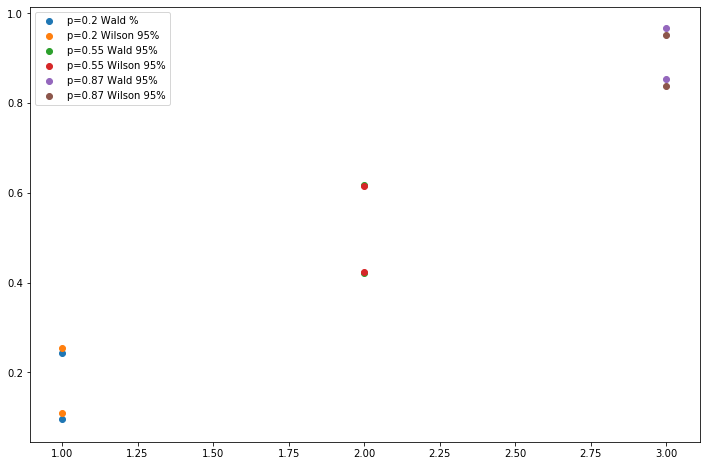

In [128]:
# точечные графики оценок вероятности доверительными интервалами в выборках
fig, ax = plt.subplots(figsize=(12,8))

idx = 1
x_1 = np.array([idx, idx])
y_1_walld = np.array([est_walld_95_low_a, est_walld_95_low_b])
y_1_wilson = np.array([est_wilson_95_low_a, est_wilson_95_low_b])

idx = idx + 1
x_2 = np.array([idx, idx])
y_2_walld = np.array([est_walld_95_mid_a, est_walld_95_mid_b])
y_2_wilson = np.array([est_wilson_95_mid_a, est_wilson_95_mid_b])

idx = idx + 1
x_3 = np.array([idx, idx])
y_3_walld = np.array([est_walld_95_high_a, est_walld_95_high_b])
y_3_wilson = np.array([est_wilson_95_high_a, est_wilson_95_high_b])

ax.scatter(x_1, y_1_walld, label = f'p={p_low} Wald %')
ax.scatter(x_1, y_1_wilson, label = f'p={p_low} Wilson 95%')
ax.scatter(x_2, y_2_walld, label = f'p={p_mid} Wald 95%')
ax.scatter(x_2, y_2_wilson, label = f'p={p_mid} Wilson 95%')
ax.scatter(x_3, y_3_walld, label = f'p={p_high} Wald 95%')
ax.scatter(x_3, y_3_wilson, label = f'p={p_high} Wilson 95%')

ax.legend()
